# Loan default Predictions
## Machine Learning Projects

## 1. Defining the mail objective

The main objective is regarding loan default predictions using Machine Learning techniques for predict and classify when a loan taker is in default or not. For this excercise I searched in Kaggle a dataset with ten thousand records strongly modified because is important to preserve the personal information of customers.

This excercise has proposals purely academics and for apply Machine learning techniques (Supervised Algorithms for this case) in the financial field because loans are an essential product for banking.
Finally, I have been reading the Book "Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow", among others resources how papers, interactive courses how guide in my custom track in AI.

### What's technique has been used?
For the excercise and considering that the frame of this problem can be adapt how a task classification and  I know the final output, I'll used the Logistic Regression and Random Forest Classifiers through Python and Scikit-Learn because is a problem of machine learning supervised with data labeled.

#### Import packages and get the data
The data can be found in the url: https://www.kaggle.com/kmldas/loan-default-prediction?select=Default_Fin.csv with the description of the problema and its features.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


#### Import the dataset in csv format

In [2]:
dataset = pd.read_csv("Default_Fin.csv", index_col = "Index")

## 2. Exploratory Data Analysis (EDA)

Previously, I should look at the big picture in general and a bit of basic statistics and a sample of the data:

In [3]:
dataset.sample(5)

,Employed,Bank Balance,Annual Salary,Defaulted?
Index,,,,
316,1,0.00,364326.60,0
4689,1,0.00,603102.48,0
7691,1,7917.72,476555.52,0
7350,0,12843.96,240636.36,0
9405,0,3260.04,168969.00,0


In [4]:
dataset.describe()

,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


####  The shape of data: Ten thousand records with five columns:

In [5]:
dataset.shape

(10000, 4)

#### Now, a briefly description of each column:

In [6]:
dataset.columns

Index(['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

#### Index:
This is the "primary key" of our database
#### Employed: 
Is a boolean variable: 1 is employed and 0 is unemployed
#### Bank Balance:
Balance of  loan taker in the moment of the request (numerical variable)
#### Annual salary:
Incomes of loan taker in a year
#### Defaulted: 
This is the target variable, 0 is equal to defaulted and 1 not defaulted

In general terms, this data has a good structure (this is important for the algorithm and Scikit-learn library given that for use techniques all data must be numerical)

With the next line code, I have been confirmed that there isn't missing values in all columns

#### In general the datatype columns are numericals:

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 390.6 KB


In [8]:
dataset.isna().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

Now, I'll use the method hist() for visualize a histogram for each numerical column:

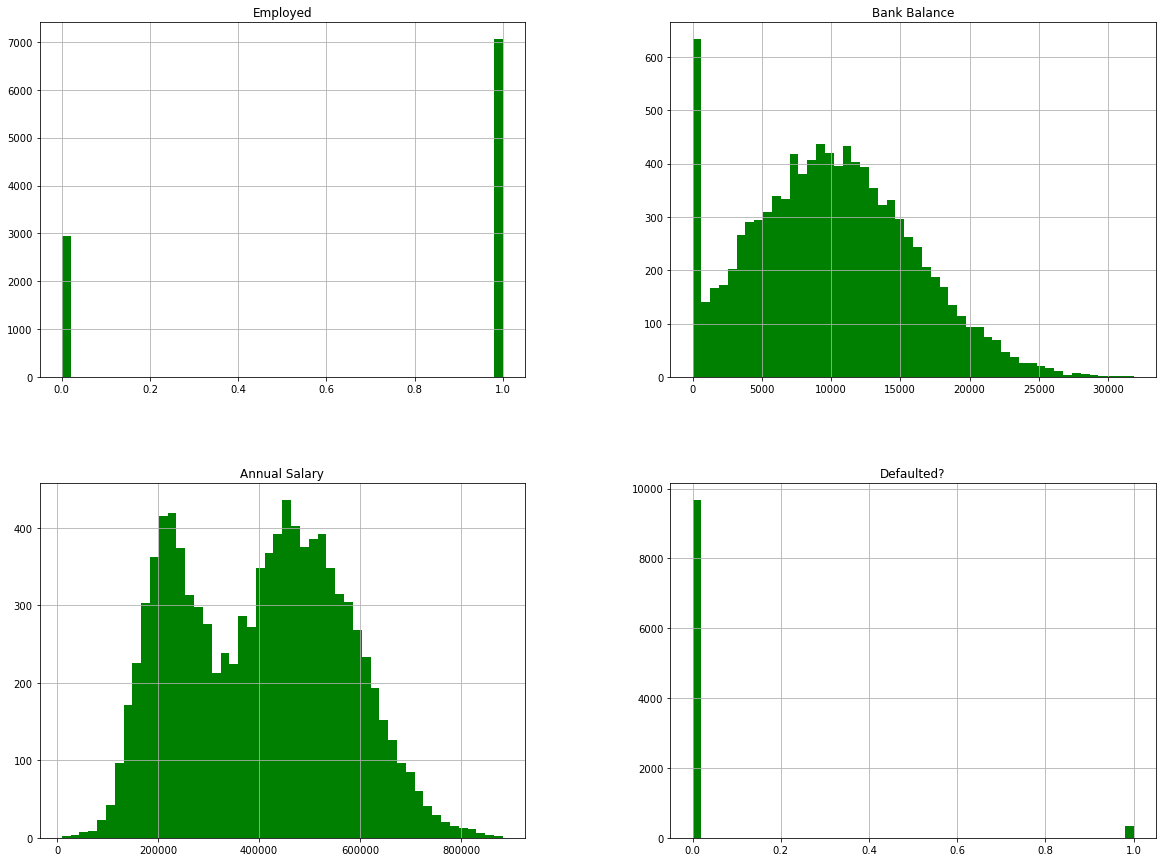

In [9]:
dataset.hist(bins=50, figsize=(20,15), color='green')
plt.show()

What's the percentage of defaults and not defaults in Defaulted and Employed columns?

For our dataset, the majority of data (70.6%) is from people that they have a job, to the contrary, 29.4% don't have a job.

In [10]:
employees   = dataset[(dataset.Employed == 1)].count() / dataset.Employed.count()
unemployees = dataset[(dataset.Employed == 0)].count() / dataset.Employed.count()
print(employees)
print(unemployees)


Employed         0.7056
Bank Balance     0.7056
Annual Salary    0.7056
Defaulted?       0.7056
dtype: float64
Employed         0.2944
Bank Balance     0.2944
Annual Salary    0.2944
Defaulted?       0.2944
dtype: float64


Moreover, the 3.3% of the data had been in default whereas the 96.7% of the loans haven't been any problem

In [11]:
defaulted = dataset[(dataset['Defaulted?'] == 1)].count() / dataset['Defaulted?'].count()
print(defaulted)

not_defaulted = dataset[(dataset['Defaulted?'] == 0)].count() / dataset['Defaulted?'].count()
print(not_defaulted)

Employed         0.0333
Bank Balance     0.0333
Annual Salary    0.0333
Defaulted?       0.0333
dtype: float64
Employed         0.9667
Bank Balance     0.9667
Annual Salary    0.9667
Defaulted?       0.9667
dtype: float64


Then, if we look at the bank balance and annual salary columns, the data has a well distribution with a bit bias. 
Maybe in the Bank balance columns, you can see a important count of people that has a littlest balance.

Other important aspect to consider, is that the percentage of defaulted loans is low, therefore we can try use later, the K-folds technique for avoid and overfitting.

Now, I'll try stablish the correlation between variables:

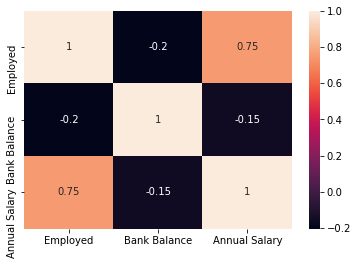

In [12]:
corr_matrix =  dataset.drop(['Defaulted?'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In the above matrix, I can verify that there is a strong correlation between Annual Salary and Bank Balance and also Defaulted and Bank Balanced (although to a minor extent).

In the next scatter plot, also verify that there isn't outliers in our data. With the alpha parameter I can identify the data concentrations in this two columns:

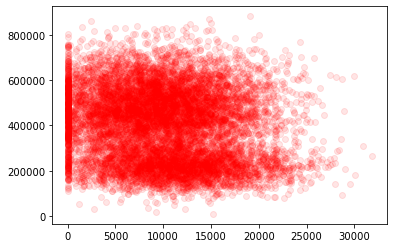

In [13]:
plt.scatter(dataset["Bank Balance"], dataset["Annual Salary"], alpha=0.1, color='r')
plt.show()

For this variables, I'll need realize a Multicollinearity analysis with VIF (Variance Inflation Factor) technique:

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
dataset.columns

Index(['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [16]:
vif_Data = pd.DataFrame()
vif_Data["Feature"] = dataset.columns

In [17]:
vif_Data['VIF'] = [variance_inflation_factor(dataset.values, i)
                      for i in range(len(dataset.columns))]

In [18]:
print(vif_Data)

         Feature        VIF
0       Employed   7.990309
1   Bank Balance   2.961159
2  Annual Salary  11.126084
3     Defaulted?   1.152220


As you can see the Employed and Annual Salary have a higher VIF (Is equal or greater than five, when VIF is less than five, not necessarily We must not adjust nothing), therefore these variables are highly correlationed, i.e. with multicollinearity. When the independent variables has a high correlation among themselves, this implies that the powerful, parameters and quality of the model can be poor. For these reasons, I should resolve this problem through Feature Scaling technique.

### 3 Feature Scaling for reduce Multicollinearity between independent variables

For this exercise, I'll standarize the Annual Salary feature (is a continue variable) substracting the mean for all observed values. However, in the context of present exercise and considering that isn't appropriate produce negative values for this column, thoses values will be negative with this standarization, remained the original values. I'll import newly the dataset adjusted:

In [19]:
dataframe = pd.read_excel("Default_fin.xlsx", index_col = "Index")    

In [20]:
dataframe.columns

Index(['Employed', ' Bank Balance ', 'AS', 'Defaulted?'], dtype='object')

In [21]:
vif_Dataframe = pd.DataFrame()
vif_Dataframe["Feature"] = dataframe.columns

In [22]:
vif_Dataframe['VIF'] = [variance_inflation_factor(dataframe.values, i)
                      for i in range(len(dataframe.columns))]

In [23]:
print(vif_Dataframe)

          Feature       VIF
0        Employed  2.147575
1   Bank Balance   2.931854
2              AS  2.806271
3      Defaulted?  1.153074


With these last results, we have been obtained  a VIF result less than 5, therefore it is already possible use all variables for the model. If running newly the correlation matrix, the results are:


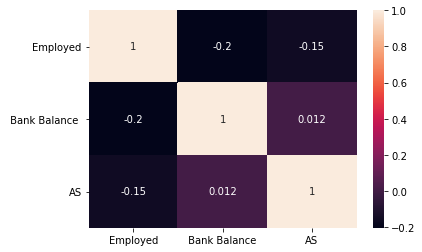

In [24]:
corr_matrix =  dataframe.drop(['Defaulted?'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

## 4  Imbalanced classes for defaulted loans

Other problem with the data is that number of a defaulted loans is only a 3% of the data, i.e. this class is imbalanced and therefore the model would have problems during the training. A possible solution for the imbalanced in defaulted column, I'll try generate a proposal with "SMOTE" Technique with the version 0.8.0. from imblearn package.

This technique consists in oversampling the examples in the minority class.

In [25]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


With this package, We will use the version 0.8.0

In [26]:
import imblearn
print(imblearn.__version__)

0.8.0


Now, I'll import other functions and packages and also split the data in two parts: X data (represent the independent variables) and y data (the target variable):

In [27]:
from numpy import mean
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
# define dataset
#X = dataframe.iloc[:, :-1].values
#y = dataframe.iloc[:, -1].values
X = dataframe.loc[:, dataframe.columns != 'Defaulted?']
y = dataframe.loc[:, dataframe.columns == 'Defaulted?']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Now, I'll apply the recommended steps for undersampling with the respective functions and also train the data:

In [28]:
#Define the variables for build the Pipeline Steps
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.5)
#under = RandomUnderSampler(sampling_strategy=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
x_columns = X_train.columns
y_columns = y_train.columns

The next lines code creates two dataframes in xlsx format with the objective of review the first data with the new records:

In [29]:
#steps = [('over', over), ('under', under), ('model', model)]
#pipeline = Pipeline(steps=steps)
over_sampling_X, over_sampling_y = over.fit_resample(X_train, y_train) 
over_sampling_X = pd.DataFrame(data=over_sampling_X, columns= x_columns )
over_sampling_y = pd.DataFrame(data=over_sampling_y, columns= y_columns )


Now, I can see the new sample of training set after applied the SMOTE function:

In [30]:
# Evaluate the pipeline
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#print('Mean ROC AUC: %.3f' % mean(scores))


print("length of oversampled data is ",len(over_sampling_X))
print("Number of non defaulted loans in oversampled data", over_sampling_y[over_sampling_y==0].value_counts())

length of oversampled data is  10170
Number of non defaulted loans in oversampled data Defaulted?
0.0           6780
dtype: int64


In [31]:
print("Number of defaulted loans",over_sampling_y[over_sampling_y==1].value_counts())
print("Proportion of defaulted loans in oversampled data is ",over_sampling_y[over_sampling_y==1].value_counts()/len(over_sampling_X))

Number of defaulted loans Defaulted?
1.0           3390
dtype: int64
Proportion of defaulted loans in oversampled data is  Defaulted?
1.0           0.333333
dtype: float64


In [32]:
#resultado_oversampling_os_X = over_sampling_X.to_excel(excel_writer='resultado_oversampling_os_X.xlsx')
#resultado_oversampling_os_y = over_sampling_y.to_excel(excel_writer='resultado_oversampling_os_y.xlsx') 


If I'll plot newly the independent variables, We can confirm a better distribution of the data:

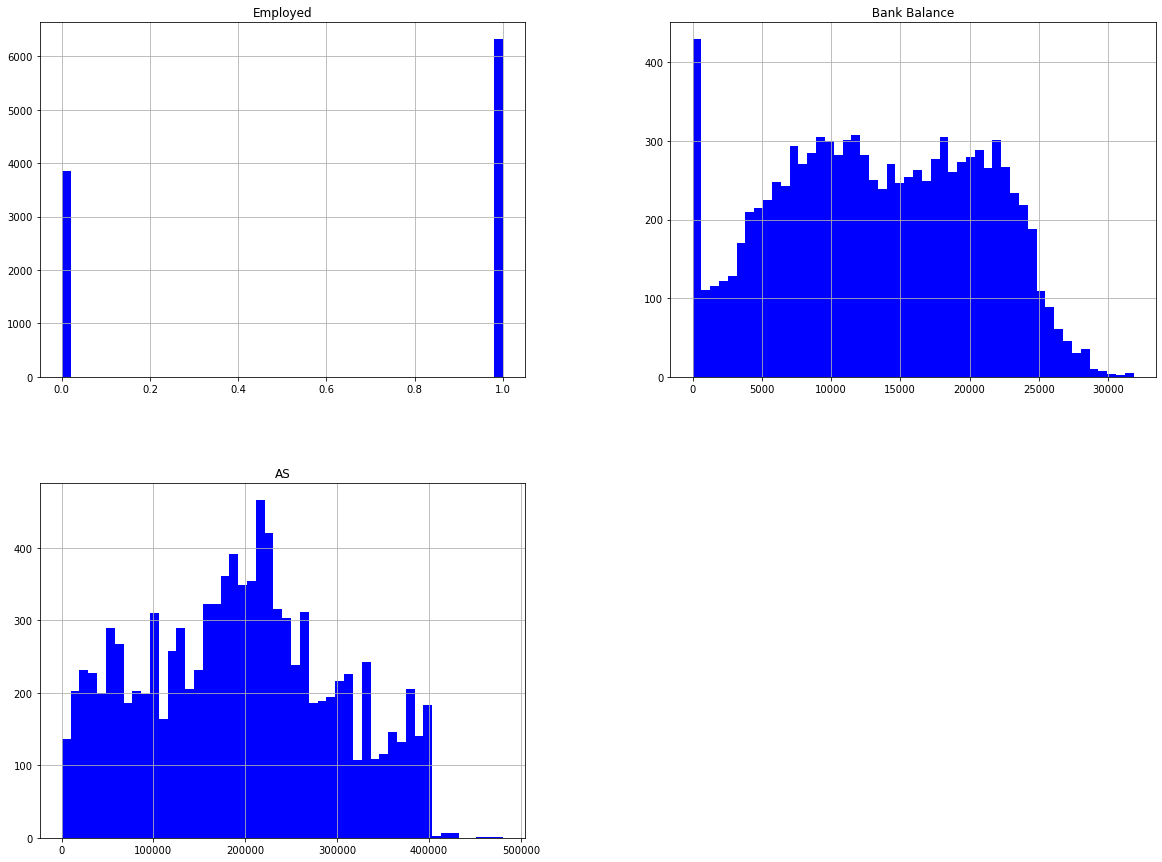

In [33]:
over_sampling_X.hist(bins=50, figsize=(20,15), color='blue')
plt.show()

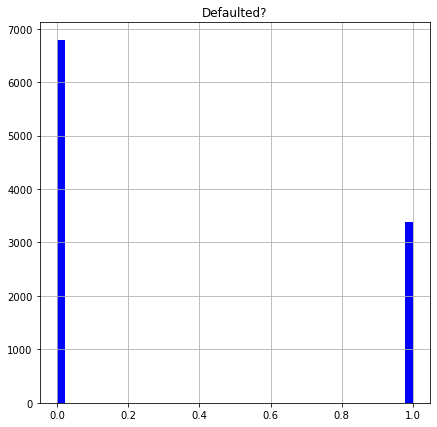

In [34]:
over_sampling_y.hist(bins=50, figsize=(7,7), color='blue')
plt.show()

# 5 Implementing the model with statsmodels
With the next result, We can use all variables for train the models:

In [35]:
import statsmodels.api as sm
logit_model=sm.Logit(over_sampling_y, over_sampling_X).fit()
#result=logit_model.fit()
#print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.434193
         Iterations 7


In [36]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:             Defaulted?   No. Observations:                10170
Model:                          Logit   Df Residuals:                    10167
Method:                           MLE   Df Model:                            2
Date:                Mon, 31 May 2021   Pseudo R-squ.:                  0.3179
Time:                        21:35:58   Log-Likelihood:                -4415.7
converged:                       True   LL-Null:                       -6473.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Employed          -2.0683      0.049    -42.261      0.000      -2.164      -1.972
 Bank Balance      0.0002   3.74e-06     46.612      0.000       0.000       0.000
AS             -9.724e-06    2.6e-07

In [37]:
yhat = logit_model.predict(X_test)
prediction = list(map(round, yhat))

In [38]:
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)
print('Test accuracy = ', accuracy_score(y_test, prediction))


Confusion Matrix : 
 [[2314  573]
 [  42   71]]
Test accuracy =  0.795


# 6 Implementing Logistic Regression the model with Scikit-learn

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [40]:
logreg.fit(over_sampling_X, over_sampling_y)

C:\Users\Teletrabajo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [41]:
ov_sam_reshape_y = np.array(over_sampling_y)

In [42]:
logreg.fit(over_sampling_X, ov_sam_reshape_y)

C:\Users\Teletrabajo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [43]:
y_pred = logreg.predict(X_test)


In [44]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [45]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2070  817]
 [  34   79]]


In [46]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.72      0.83      2887
           1       0.09      0.70      0.16       113

    accuracy                           0.72      3000
   macro avg       0.54      0.71      0.49      3000
weighted avg       0.95      0.72      0.80      3000



The final result of this algorithm, the effectiveness is low, therefore I'll apply other algorithm:

# 7. Implementing Random Forest Classifiers  model with Scikit-learn

In [48]:
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=100)
clf.fit(over_sampling_X,over_sampling_y)


<ipython-input-48-6a6526c5b6f3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(over_sampling_X,over_sampling_y)


RandomForestClassifier()

In [49]:
y_pred_RFC=clf.predict(X_test)


In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RFC))


Accuracy: 0.9206666666666666


This result is apparently better that Logistic Regression. For prove both results, I'll apply The ROC curve because the curves of different models can be compared directly in general:

# 6 ROC CURVE

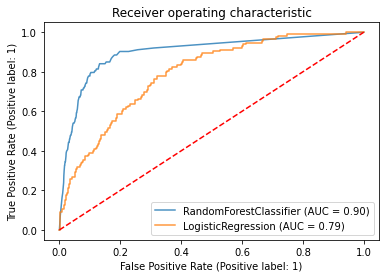

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_roc_auc = plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8)
logreg_roc_auc = plot_roc_curve(logreg, X_test, y_test, ax=ax, alpha=0.8)

#logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#plt.figure()
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Conclusions:

Finally, with this exercise, I can conclude that:

1. The Exploratory Data Analysis is fundamental to examine the data quality, possible bias, the data distribution,among others.

2. It's important define the objective and the target variable. Regard to regressors is a decisive factor,study about the   correlation between variables and the statistical analysis.

3. When you can understand the data distribution in a concrete context, this knowledge helps to better build and train of the model and therefore you can better understand the algorithms applied. In this case, I consider that was important consider the resampling of the data for avoid the under or overfitting of the algorithms. It was difficult because I've been researching about the SMOTE Technique and its application through Python, I had never thought about this particularity with this dataset.

4. Morerover of the accuracy of both models, the ROC curve helps to understand the quality models of a graphical form.

5. With the above plot, We can confirm that the Random Forest Classifier performs better than the previous one.



# References

https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/#:~:text=Statsmodels%20provides%20a%20Logit(),then%20fitted%20to%20the%20data.&text=In%20the%20output%2C%20'Iterations',trying%20to%20optimise%20the%20model.

[1] Brownlee, J.(2021). SMOTE for Imbalanced Classification with Python. Taken from: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/


[2] Brownlee, J.(2021). How to Use ROC Curves and Precision-Recall Curves for Classification in Python. Taken from: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

[3] Scikit-learn. SMOTE.Taken from: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

[4] GeeksforGeeks.(2020). Logistic Regression using Statsmodels. Taken from:https://www.geeksforgeeks.org/logistic-regression-using-tatsmodels/#:~:text=Statsmodels%20provides%20a%20Logit(),then%20fitted%20to%20the%20data.&text=In%20the%20output%2C%20'Iterations',trying%20to%20optimise%20the%20model.

[5] Zhao, S.(2020). Predicting Loan Defaults Using Logistic Regression. Taken from: https://selenaezhao.medium.com/predicting-loan-defaults-using-logistic-regression-71b7482a8cf7

[5] Jia, H.(2018). Bank Loan Default Prediction with Machine Learning. Taken from: https://medium.com/henry-jia/bank-loan-default-prediction-with-machine-learning-e9336d19dffa

[6] Li, S.(2017). Building A Logistic Regression in Python, Step by Step. Taken from: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8



